# Black Friday Sales Prediction 

### Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

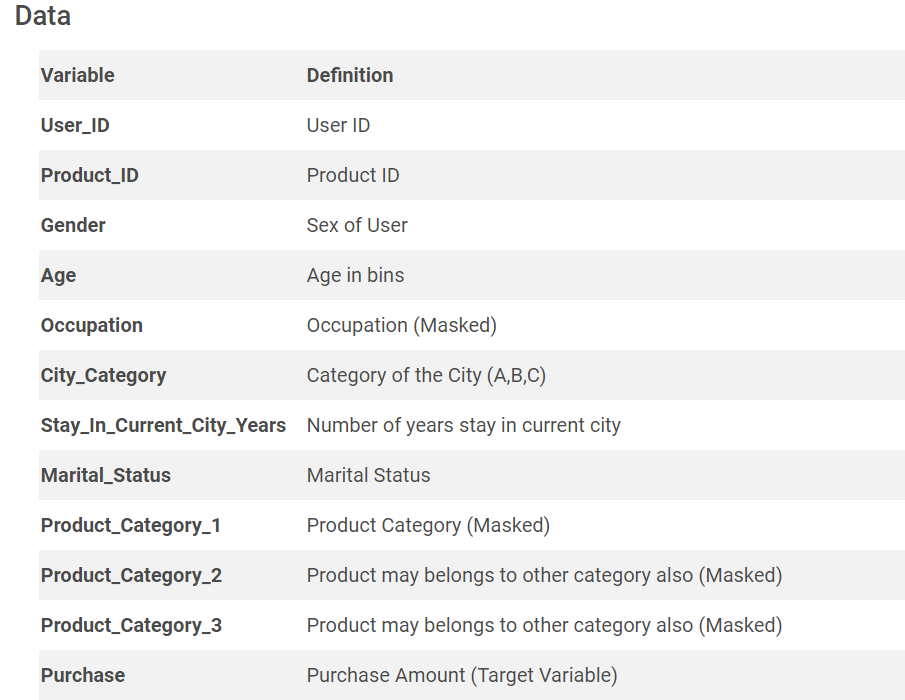

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Setting Working Directory

In [2]:
os.chdir(r"E:\Hackathon\BLACK-FRIDAY-SALES-PREDICTION-ANALYTICSVIDHYA-HACKATHON")
path_data = os.getcwd()

## Importing data

In [3]:
train_data = pd.read_csv('train.csv')

In [4]:
train_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
test_data = pd.read_csv('test.csv')

In [6]:
test_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [7]:
train_data.shape

(550068, 12)

In [8]:
test_data.shape

(233599, 11)

In [9]:
# Now lets look the descriptive analysis for train data
train_data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [10]:
# Now lets look the descriptive analysis for test data
test_data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,2.335990e+05,233599.000000,233599.000000,233599.000000,161255.000000,71037.000000
mean,1.003029e+06,8.085407,0.410070,5.276542,9.849586,12.669454
std,1.726505e+03,6.521146,0.491847,3.736380,5.094943,4.125944
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000
25%,1.001527e+06,2.000000,0.000000,1.000000,5.000000,9.000000
50%,1.003070e+06,7.000000,0.000000,5.000000,9.000000,14.000000
75%,1.004477e+06,14.000000,1.000000,8.000000,15.000000,16.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000


User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64


<AxesSubplot:>

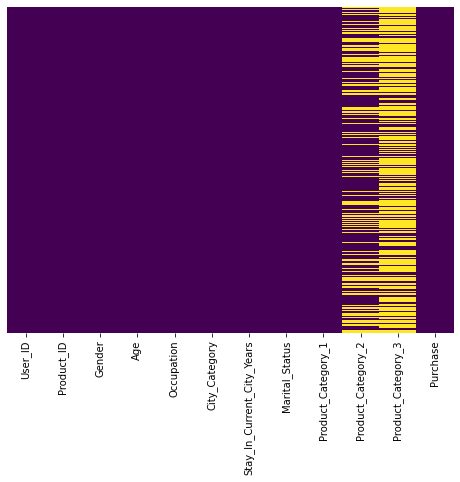

In [11]:
print(train_data.isnull().sum())

# to see missing value using visualisation
plt.figure(figsize=(8,6))
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
train_data.isnull().sum()/train_data.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64


<AxesSubplot:>

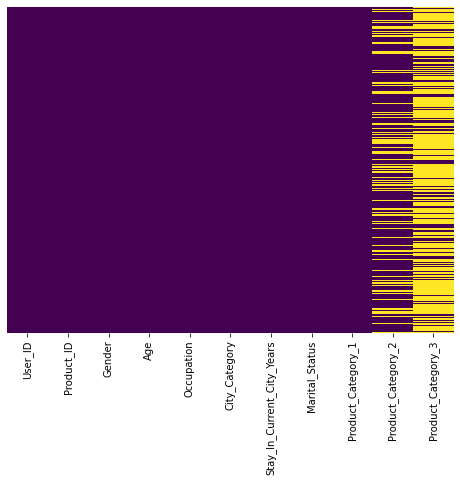

In [13]:
print(test_data.isnull().sum())

# to see missing value using visualisation
plt.figure(figsize=(8,6))
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


## Data Pre-processing

We can drop User_ID and Product_ID for model prediction as it has more unique values.

In [15]:
#Training Data cleaning

In [16]:
train_data=train_data.drop(['User_ID','Product_ID'], axis=1)
train_data=train_data.fillna(0)

In [17]:
train_data[['Product_Category_2']]=train_data[['Product_Category_2']].astype(int)
train_data[['Product_Category_3']]=train_data[['Product_Category_3']].astype(int)
train_data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,0,0,8370
1,F,0-17,10,A,2,0,1,6,14,15200
2,F,0-17,10,A,2,0,12,0,0,1422
3,F,0-17,10,A,2,0,12,14,0,1057
4,M,55+,16,C,4+,0,8,0,0,7969


In [18]:
#Test Data cleaning

In [19]:
test_data=test_data.drop(['User_ID','Product_ID'], axis=1)
test_data=test_data.fillna(0)

In [20]:
test_data[['Product_Category_2']]=test_data[['Product_Category_2']].astype(int)
test_data[['Product_Category_3']]=test_data[['Product_Category_3']].astype(int)
test_data

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,M,46-50,7,B,2,1,1,11,0
1,M,26-35,17,C,0,0,3,5,0
2,F,36-45,1,B,4+,1,5,14,0
3,F,36-45,1,B,4+,1,4,9,0
4,F,26-35,1,C,1,0,4,5,12
...,...,...,...,...,...,...,...,...,...
233594,F,26-35,15,B,4+,1,8,0,0
233595,F,26-35,15,B,4+,1,5,8,0
233596,F,26-35,15,B,4+,1,1,5,12
233597,F,46-50,1,C,4+,0,10,16,0


## Exploratory Data Analysis

### Target variable -- Purchase

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


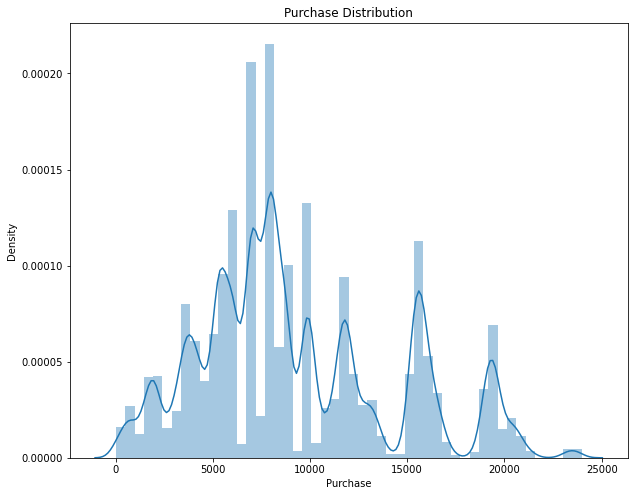

In [21]:
plt.figure(figsize=(10,8))
sns.distplot(train_data["Purchase"])
plt.title("Purchase Distribution")
plt.show()

We can observe that purchase amount is repeating for many customers.This may be because on Black Friday many are buying discounted products in large numbers and kind of follows a Gaussian Distribution.m

In [22]:
train_data['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

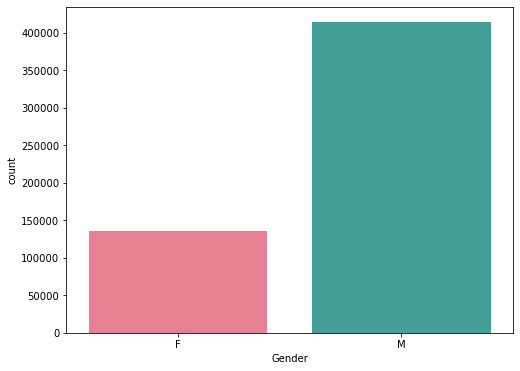

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(x ='Gender', data = train_data, palette ='husl')
plt.show()

Male customers have done more transactions than female.

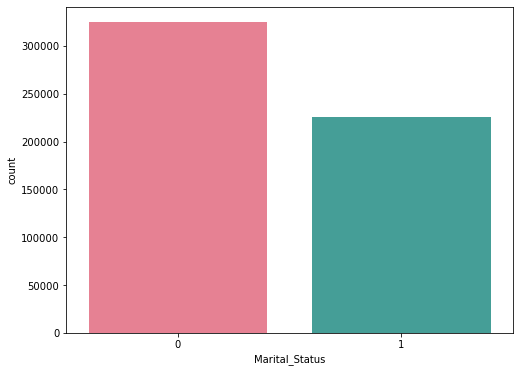

In [24]:
plt.figure(figsize=(8,6))
sns.countplot(x ='Marital_Status', data = train_data, palette ='husl')
plt.show()

There are more unmarried customers in the dataset who purchase more during black friday sales

In [25]:
train_data.groupby("Marital_Status").mean()["Purchase"]

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

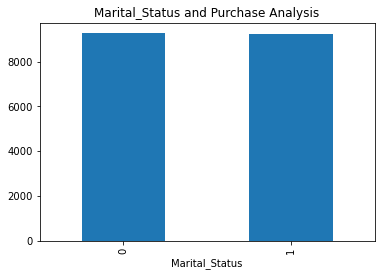

In [26]:
train_data.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar')
plt.title("Marital_Status and Purchase Analysis")
plt.show()

From above ananlysis we can say that the Average purchase amount of married and unmarried customers are the same, though unmarried customers purchased more than married customers.

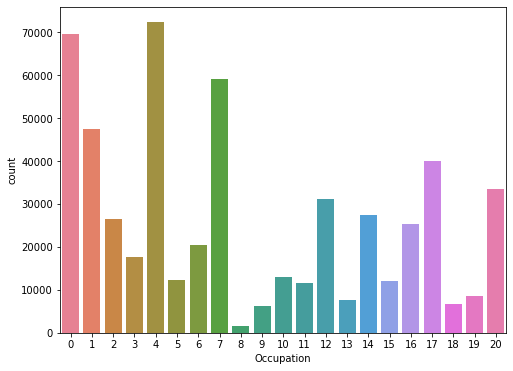

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(x ='Occupation', data = train_data, palette ='husl')
plt.show()

Customers whose occupations are 0 and 4 have done more transactions during sales

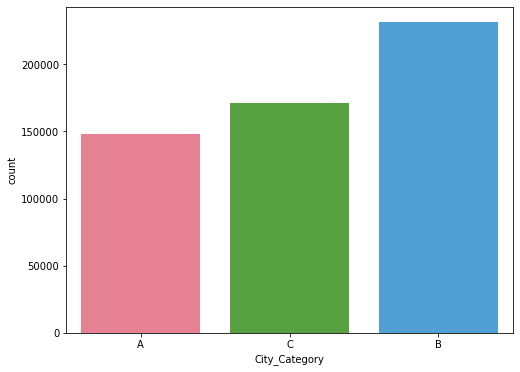

In [28]:
plt.figure(figsize=(8,6))
sns.countplot(x ='City_Category', data = train_data, palette ='husl')
plt.show()

We can see that city category B has made the most number of puchases followed by C.

In [29]:
train_data.groupby("City_Category").mean()["Purchase"]

City_Category
A    8911.939216
B    9151.300563
C    9719.920993
Name: Purchase, dtype: float64

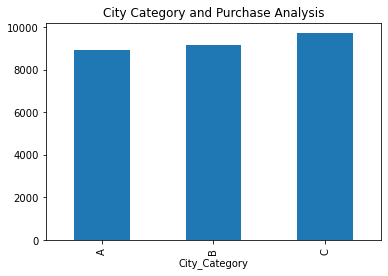

In [30]:
train_data.groupby("City_Category").mean()["Purchase"].plot(kind='bar')
plt.title("City Category and Purchase Analysis")
plt.show()

We observe that the customers from city C spends the most.

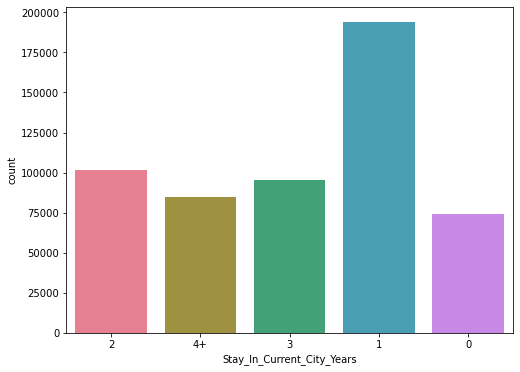

In [31]:
plt.figure(figsize=(8,6))
sns.countplot(x ='Stay_In_Current_City_Years', data = train_data, palette ='husl')
plt.show()

It looks like the longest customer is living in that city are less prone to buy new things whereas Customers which are new in town are more likely to take advantage of the low prices in Black Friday Sales.

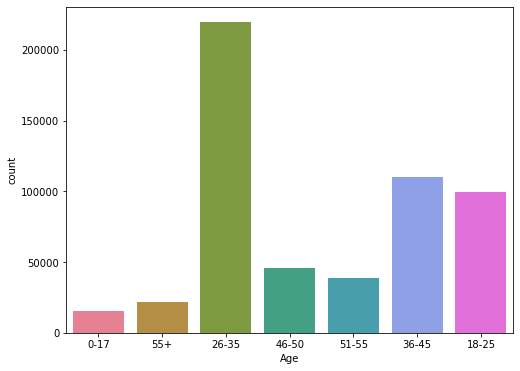

In [32]:
plt.figure(figsize=(8,6))
sns.countplot(x ='Age', data = train_data, palette ='husl')
plt.show()

We can see that the Age group (26-35) makes the most no. of purchases during Black Friday Sales.

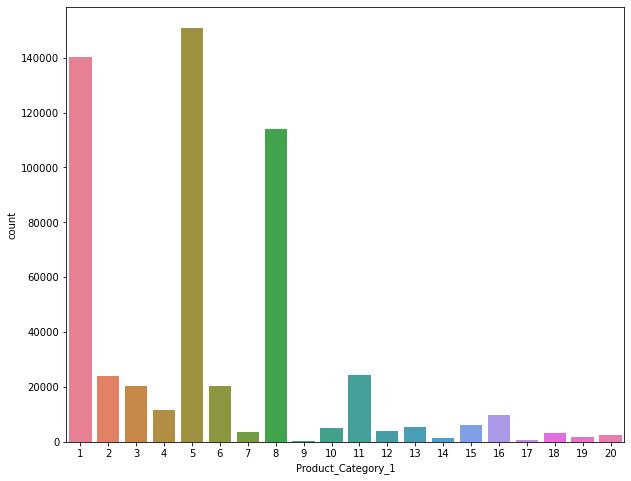

In [33]:
plt.figure(figsize=(10,8))
sns.countplot(x ='Product_Category_1', data = train_data, palette ='husl')
plt.show()

For Product_Category_1, the numbers 1, 5 and 8 have the most number of purchases.

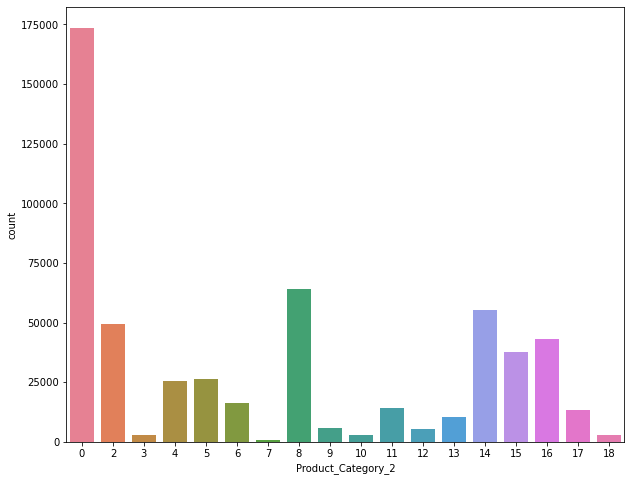

In [34]:
plt.figure(figsize=(10,8))
sns.countplot(x ='Product_Category_2', data = train_data, palette ='husl')
plt.show()

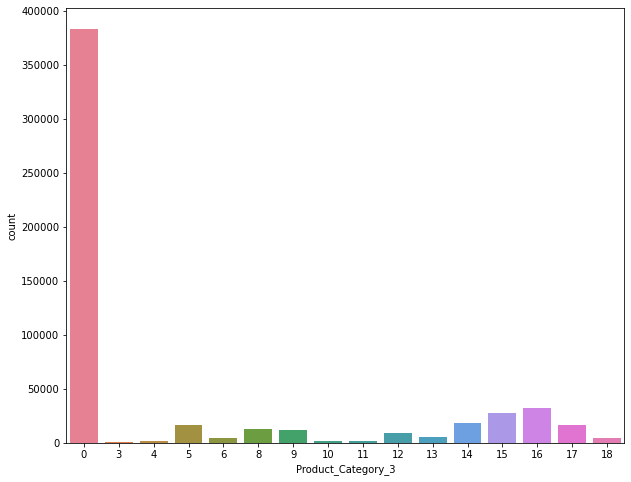

In [35]:
plt.figure(figsize=(10,8))
sns.countplot(x ='Product_Category_3', data = train_data, palette ='husl')
plt.show()

## Correlation 

In [36]:
train_data.corr()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Occupation,1.000000,0.024280,-0.007618,0.006712,0.012269,0.020833
Marital_Status,0.024280,1.000000,0.019888,0.001099,-0.004629,-0.000463
Product_Category_1,-0.007618,0.019888,1.000000,-0.067877,-0.385534,-0.343703
Product_Category_2,0.006712,0.001099,-0.067877,1.000000,0.094750,0.052288
Product_Category_3,0.012269,-0.004629,-0.385534,0.094750,1.000000,0.288501
Purchase,0.020833,-0.000463,-0.343703,0.052288,0.288501,1.000000


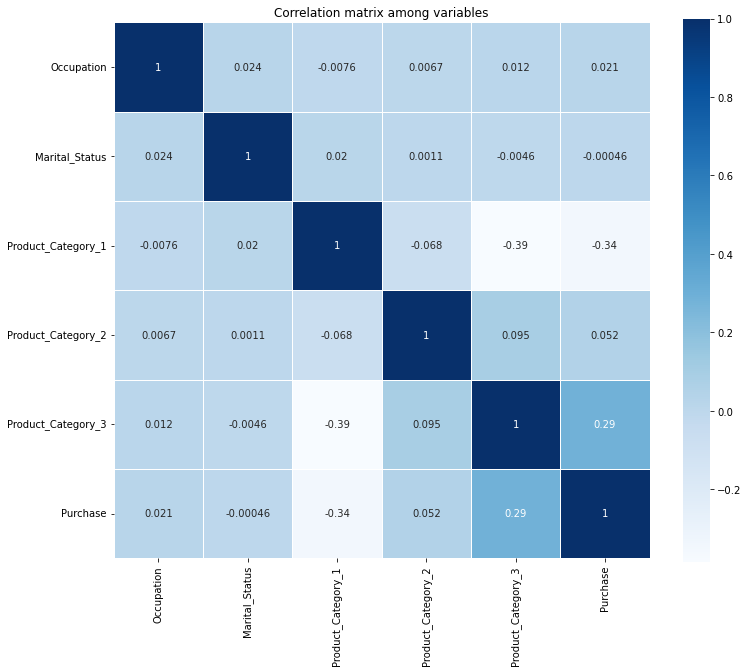

In [37]:
# Heatmap

plt.figure(figsize=(12,10))
sns.heatmap(train_data.corr(), square=True, annot=True, linewidths=.5, cmap="Blues")
plt.title("Correlation matrix among variables")
plt.show()

## Feature Engineering

In [38]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [39]:
# Encoding the categorical variables for train data

train_data['Gender'] = lr.fit_transform(train_data['Gender'])
train_data['Age'] = lr.fit_transform(train_data['Age'])
train_data['City_Category'] = lr.fit_transform(train_data['City_Category'])

In [40]:
train_data['Stay_In_Current_City_Years'] = train_data['Stay_In_Current_City_Years'].replace(to_replace="4+",value="4")

In [41]:
train_data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,0,0,8370
1,0,0,10,0,2,0,1,6,14,15200
2,0,0,10,0,2,0,12,0,0,1422
3,0,0,10,0,2,0,12,14,0,1057
4,1,6,16,2,4,0,8,0,0,7969


In [42]:
# Encoding the categorical variables for test data

test_data['Gender'] = lr.fit_transform(test_data['Gender'])
test_data['Age'] = lr.fit_transform(test_data['Age'])
test_data['City_Category'] = lr.fit_transform(test_data['City_Category'])

In [43]:
test_data['Stay_In_Current_City_Years'] = test_data['Stay_In_Current_City_Years'].replace(to_replace="4+",value="4")

In [44]:
test_data['Stay_In_Current_City_Years'] = test_data['Stay_In_Current_City_Years'].astype(int)

In [45]:
test_data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1,4,7,1,2,1,1,11,0
1,1,2,17,2,0,0,3,5,0
2,0,3,1,1,4,1,5,14,0
3,0,3,1,1,4,1,4,9,0
4,0,2,1,2,1,0,4,5,12


## Creating the Independendent and Dependent Data Sets

In [46]:
X = train_data.drop("Purchase",axis=1)

In [47]:
y = train_data['Purchase']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Feature Scaling: Standarisation of data

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [51]:
X_test_scaled = scaler.transform(X_test)

## Linear Regression

In [52]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression

In [53]:
regressor  = LinearRegression()
regressor .fit(X_train_scaled,y_train)

LinearRegression()

In [54]:
# Predicting the Test set results
y_pred = regressor.predict(X_test_scaled)

In [57]:
y_pred.shape

(165021,)

In [58]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [59]:
mean_absolute_error(y_test, y_pred)

3532.081650875999

In [60]:
mean_squared_error(y_test, y_pred)

21398226.092867162

In [61]:
r2_score(y_test, y_pred)

0.15191466893823047

In [62]:
from math import sqrt
print("RMSE of Linear Regression Model on test data is ",sqrt(mean_squared_error(y_test, y_pred)))

RMSE of Linear Regression Model on test data is  4625.821666781715


## DecisionTreeRegressor

In [63]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor(random_state = 0)  

In [64]:
dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=0)

In [65]:
dt_y_pred = dt.predict(X_test_scaled)

In [66]:
r2_score(y_test, dt_y_pred)

0.5540454199021034

In [67]:
print("RMSE of Decision Tree Model on test data is ",sqrt(mean_squared_error(y_test, dt_y_pred)))

RMSE of Decision Tree Model on test data is  3354.39671854916


## Random Forest Regressor

In [68]:
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [69]:
rfregressor.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [70]:
rf_y_pred = rfregressor.predict(X_test_scaled)

In [71]:
r2_score(y_test, rf_y_pred)

0.6190412416384221

In [72]:
print("RMSE of Random Forest Model on test data is ",sqrt(mean_squared_error(y_test, rf_y_pred)))

RMSE of Random Forest Model on test data is  3100.331205059011


## XGBoost Regressor

In [73]:
from xgboost.sklearn import XGBRegressor

In [74]:
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

In [75]:
xgb_reg.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.0, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=40, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [78]:
xgb_y_pred = xgb_reg.predict(X_test_scaled)

In [79]:
r2_score(y_test, xgb_y_pred)

0.6726359197230936

In [80]:
print("RMSE of XGBoost Model on test data is ",sqrt(mean_squared_error(y_test, xgb_y_pred)))

RMSE of XGBoost Model on test data is  2873.9858316671825


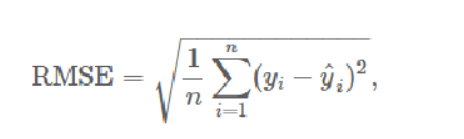

## Best RMSE value and r2 score is achieved by XGBoost Regressor model

* RMSE : 2872.6

* r2 score : 0.67

In [81]:
test_scaled = scaler.transform(test_data)

In [82]:
predict = xgb_reg.predict(test_scaled)

In [83]:
submission = pd.read_csv(r"sample_submission_V9Inaty.csv")

In [84]:
submission['Purchase'] = predict

In [85]:
submission.to_csv('Sample_Submission.csv', index=False)